In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.lines as mlines

from itertools import cycle
from matplotlib import pyplot as plt

from simulation import SimulationMixin


In [2]:
fontsize = 20

plots_dir = "plots"

In [3]:
colors = [("red", "red"), ("green", "green"), ("blue", "blue"), ("orange", "orange")]
color_cycle = cycle(colors)

In [4]:
# program = "coloring"
program = "maximal_matching"
# program = "dijkstra"
# graph_name = "graph_powerlaw_cluster_graph_n7"
# graph_name = "implicit_graph_n8"
graph_name = "star_graph_0_n7"
sched = 0
no_simulations = 10000
me = False
fault_interval = 2

duong_mode = True

selected_nodes = [0]

In [5]:
def get_filename(graph_name, sched, simulation_type, args, no_simulations, me, fault_interval):
    return f"{graph_name}__{sched}__{simulation_type}_args_{args}__{no_simulations}__{me}__{fault_interval}"

In [6]:
# filenames = [
#     get_filename(
#         graph_name,
#         sched,
#         SimulationMixin.RANDOM_FAULT_SIMULATION_TYPE,
#         "",
#         no_simulations,
#         me,
#         fault_interval,
#     )
# ]
filenames = []
if duong_mode:
    filenames.extend(
        [
            get_filename(
                graph_name,
                sched,
                SimulationMixin.CONTROLLED_FAULT_AT_NODE_SIMULATION_TYPE_DUONG,
                arg,
                no_simulations,
                me,
                fault_interval,
            )
            for arg in selected_nodes
        ]
    )
else:
    filenames.extend(
        [
            get_filename(
                graph_name,
                sched,
                SimulationMixin.CONTROLLED_FAULT_AT_NODE_SIMULATION_TYPE,
                arg,
                no_simulations,
                me,
                fault_interval,
            )
            for arg in selected_nodes
        ]
    )


In [7]:
dfs = [pd.read_csv(os.path.join("results", program, f"{fn}.csv")) for fn in filenames]

In [8]:
max_steps = max(df['Steps'].max() for df in dfs)
max_steps

np.int64(436)

In [9]:
bins = np.linspace(17, max_steps, max_steps+1)
# bin_centers = (bins[:-1] + bins[1:]) / 2
bin_centers = bins

In [10]:
bins

array([ 17.        ,  17.96100917,  18.92201835,  19.88302752,
        20.8440367 ,  21.80504587,  22.76605505,  23.72706422,
        24.68807339,  25.64908257,  26.61009174,  27.57110092,
        28.53211009,  29.49311927,  30.45412844,  31.41513761,
        32.37614679,  33.33715596,  34.29816514,  35.25917431,
        36.22018349,  37.18119266,  38.14220183,  39.10321101,
        40.06422018,  41.02522936,  41.98623853,  42.94724771,
        43.90825688,  44.86926606,  45.83027523,  46.7912844 ,
        47.75229358,  48.71330275,  49.67431193,  50.6353211 ,
        51.59633028,  52.55733945,  53.51834862,  54.4793578 ,
        55.44036697,  56.40137615,  57.36238532,  58.3233945 ,
        59.28440367,  60.24541284,  61.20642202,  62.16743119,
        63.12844037,  64.08944954,  65.05045872,  66.01146789,
        66.97247706,  67.93348624,  68.89449541,  69.85550459,
        70.81651376,  71.77752294,  72.73853211,  73.69954128,
        74.66055046,  75.62155963,  76.58256881,  77.54

In [11]:
hist_data = [np.histogram(df['Steps'], bins=bins) for df in dfs]
hist_data[0][0]

array([303, 137, 263, 135, 249, 154, 224, 140, 255, 127, 223, 150, 191,
       129, 171, 113, 154, 127, 141, 113, 154, 114, 114, 145, 114,   0,
       123, 113, 123,  82, 109,  87, 113,  80,  92,  76,  95,  44,  79,
        62,  87,  52,  72,  39,  60,  50,  86,  40,  69,  31,  71,   0,
        35,  52,  39,  74,  35,  69,  18,  56,  25,  66,  17,  63,  16,
        48,  14,  48,  15,  45,  11,  38,  20,  42,   9,  45,   0,   9,
        33,   7,  38,   6,  38,   7,  26,   7,  36,  10,  37,   7,  35,
        10,  38,   8,  31,   6,  26,   3,  37,   1,  21,   5,   0,  18,
         5,  21,   3,  18,   1,  18,   5,  20,   1,  14,   4,  12,   0,
        22,   1,   7,   1,  11,   1,  14,   2,  14,   1,  16,   0,   0,
        13,   3,   7,   0,  10,   1,  13,   0,  10,   2,   7,   3,  13,
         0,   8,   0,  11,   0,   9,   0,  11,   0,  10,   0,   0,   8,
         1,   7,   0,  13,   0,   3,   0,   4,   0,   4,   0,   6,   1,
         1,   0,   3,   1,   2,   0,   6,   0,   8,   0,   0,   

In [12]:
hist_data = [np.histogram(df['Steps'], bins=bins) for df in dfs]
hist_df = []
for hd in hist_data:
    hist_df.append(
        pd.DataFrame({
            'Steps': bin_centers[:-1],
            'Count': hd[0]
        })
    )

In [13]:
hist_df[0]

,Steps,Count
0,17.000000,303
1,17.961009,137
2,18.922018,263
3,19.883028,135
4,20.844037,249
...,...,...
431,431.194954,0
432,432.155963,0
433,433.116972,0
434,434.077982,0


In [14]:
df_merged = hist_df[0]
for i in range(1, len(hist_df)):
    df_merged = pd.merge(df_merged, hist_df[i], on=["Steps"], suffixes=(i-1, i))
df_merged

,Steps,Count
0,17.000000,303
1,17.961009,137
2,18.922018,263
3,19.883028,135
4,20.844037,249
...,...,...
431,431.194954,0
432,432.155963,0
433,433.116972,0
434,434.077982,0


In [15]:
df_merged.set_index('Steps', drop=True, inplace=True)
df_merged

,Count
Steps,
17.000000,303
17.961009,137
18.922018,263
19.883028,135
20.844037,249
...,...
431.194954,0
432.155963,0
433.116972,0


In [16]:
def get_title():
    return f"Simulation - {program} | {graph_name} | Sched: {sched} | N: {no_simulations:,} | FI: {fault_interval}"

In [17]:
def get_filename():
    return f"{program}__{graph_name}__{sched}__{no_simulations}__{fault_interval}__{''.join([str(i) for i in selected_nodes])}{'__duong' if duong_mode else ''}"

In [18]:
# from scipy.optimize import curve_fit


# def exp_func(x, a, b):
#     return a * np.exp(b * x)


# # Fit the curve
# popt, pcov = curve_fit(exp_func, df_merged.index, df_merged["Count"])
# y_fit = exp_func(df_merged.index, popt[0], popt[1])
# df_merged[f"exp_fit"] = y_fit

Saved plot(s) for plots/maximal_matching/maximal_matching__star_graph_0_n7__0__10000__2__0__duong.png


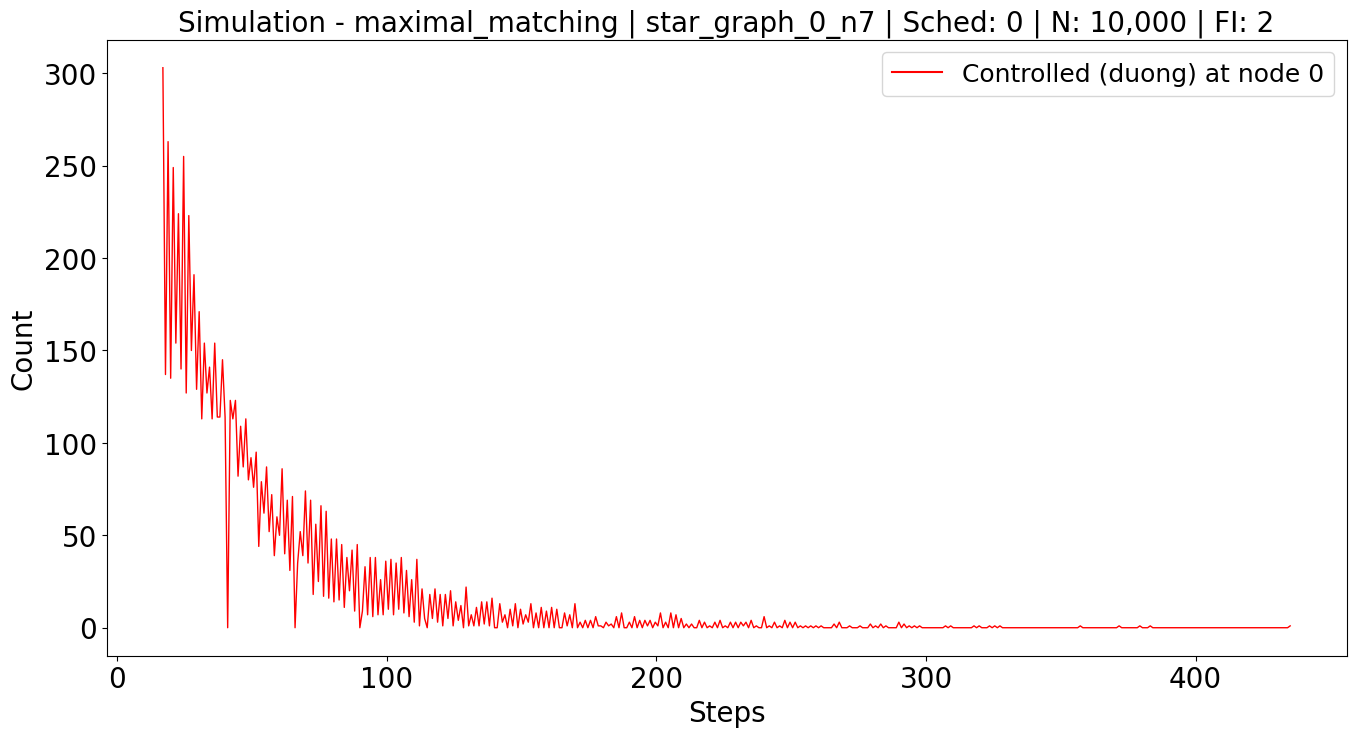

In [19]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=df_merged, linewidth=1)
ax.set_title(get_title(), fontdict={"fontsize": fontsize})

# ax.set_yscale("log")
for i, line in enumerate(ax.lines):
    if i >= 0:
        line_style = "solid"
        line.set_color(next(color_cycle)[0])
    else:
        line_style = "dashed"
        line.set_color("goldenrod")
    line.set_linestyle(line_style)

ax.tick_params(axis="x", labelsize=fontsize)
ax.tick_params(axis="y", labelsize=fontsize)
ax.xaxis.label.set_size(fontsize)
ax.yaxis.label.set_size(fontsize)

ax.set_xlabel("Steps")
ax.set_ylabel("Count")

# labels = ["Random Fault"]
labels = []
labels.extend(
    [
        f'Controlled {"(duong)" if duong_mode else ""} at node {n}'
        for n in selected_nodes
    ]
)
# labels.append(f"$y = {popt[0]:.2f}e^{{{popt[1]:.2f}x}}$")

custom_lines = [
    mlines.Line2D(
        [],
        [],
        color=line.get_color(),
        # marker=marker,
        label=cat,
        linestyle=line.get_linestyle(),
    )
    for line, cat in zip(ax.lines, labels)
]
plt.rc("font", size=fontsize)
plt.legend(handles=custom_lines, fontsize=fontsize * 0.9)
file_path = os.path.join(
    plots_dir,
    program,
    f"{get_filename()}.png",
)


# plt.savefig(
#     file_path,
#     bbox_inches="tight",
# )
# plt.close()

print(f"Saved plot(s) for {file_path}")

In [20]:
df_merged

,Count
Steps,
17.000000,303
17.961009,137
18.922018,263
19.883028,135
20.844037,249
...,...
431.194954,0
432.155963,0
433.116972,0


In [21]:
# # Save to file
# df_merged.columns = [
#     "Random",
#     *[
#         f'Controlled {"(duong)" if duong_mode else ""} at node {n}'
#         for n in selected_nodes
#     ],
# ]
# df_merged.index = df_merged.index.astype(int)
# df_merged.to_csv(
#     os.path.join("results", program, f"agg_{get_filename()}.csv")
# )